In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
date = '2025-01'

unit = 'us' if int(date[3])>=5 else 'ms'

Binance data

In [3]:
df_binance = pd.read_csv(f'data/ETHUSDC/ETHUSDC-1m-{date}.csv')
df_binance.head()

,1735689600000000,3330.93000000,3331.24000000,3329.32000000,3330.57000000,17.12060000,1735689659999999,57020.74822900,67,8.97090000,29876.78308100,0
0,1735689660000000,3331.58,3332.15,3330.82,3331.86,10.5409,1735689719999999,35116.395330,40,4.0839,13604.885936,0
1,1735689720000000,3333.15,3335.40,3333.15,3335.40,27.2397,1735689779999999,90822.042410,71,16.5707,55248.559048,0
2,1735689780000000,3335.41,3335.41,3331.59,3332.34,14.7232,1735689839999999,49070.250706,36,9.9934,33302.736135,0
3,1735689840000000,3332.91,3335.09,3332.68,3332.76,15.6296,1735689899999999,52110.931354,45,5.7440,19149.126494,0
4,1735689900000000,3333.00,3335.65,3333.00,3335.65,2.5051,1735689959999999,8352.321745,13,2.0204,6735.532190,0


In [4]:
df_binance.columns=['time', 'open', 'high', 'low', 'close', 's1', 's2', 's3', 's4', 's5', 's6', 's7']

In [5]:
df_binance = df_binance[['time', 'open', 'high', 'low', 'close']].copy()
df_binance.set_index('time', inplace=True)
df_binance.index = pd.to_datetime(df_binance.index, unit=unit, utc=True)
df_binance.head()

,open,high,low,close
time,,,,
2025-01-01 00:01:00+00:00,3331.58,3332.15,3330.82,3331.86
2025-01-01 00:02:00+00:00,3333.15,3335.40,3333.15,3335.40
2025-01-01 00:03:00+00:00,3335.41,3335.41,3331.59,3332.34
2025-01-01 00:04:00+00:00,3332.91,3335.09,3332.68,3332.76
2025-01-01 00:05:00+00:00,3333.00,3335.65,3333.00,3335.65


In [6]:
df_binance = df_binance[['open', 'close']]
df_binance.head()

,open,close
time,,
2025-01-01 00:01:00+00:00,3331.58,3331.86
2025-01-01 00:02:00+00:00,3333.15,3335.40
2025-01-01 00:03:00+00:00,3335.41,3332.34
2025-01-01 00:04:00+00:00,3332.91,3332.76
2025-01-01 00:05:00+00:00,3333.00,3335.65


In [7]:
df_binance['log_return'] = np.log(df_binance['close'] / df_binance['close'].shift(1))
df_binance = df_binance.dropna()
minutes_per_year = 365 * 24 * 60 
volatility = df_binance['log_return'].std() * np.sqrt(minutes_per_year)
print(f"Annual : {volatility:.2%}")
print(f"Daily : {volatility/np.sqrt(365):.2%}")

Annual : 72.15%
Daily : 3.78%


Dune data (uniswap)

In [ ]:
df_uni = pd.read_csv(f'data/dune/sync_agg_{date}.csv')
df_uni.columns=['time', 'reserve0', 'reserve1']
df_uni.head()

,time,reserve0,reserve1
0,2025-01-01 00:00:00.000 UTC,23382336775118,7021267070425214678921
1,2025-01-01 00:02:00.000 UTC,23383137447393,7021027373367221923614
2,2025-01-01 00:04:00.000 UTC,23380043651564,7021959250683989078002
3,2025-01-01 00:05:00.000 UTC,23379231770140,7022203833265276774341
4,2025-01-01 00:06:00.000 UTC,23375337352994,7023377441335380052957


In [9]:
df_uni['USDC'] = df_uni['reserve0']*1e-6
df_uni['WETH'] = df_uni['reserve1'].astype(float)*1e-18
df_uni.head()

,time,reserve0,reserve1,USDC,WETH
0,2025-01-01 00:00:00.000 UTC,23382336775118,7021267070425214678921,2.338234e+07,7021.267070
1,2025-01-01 00:02:00.000 UTC,23383137447393,7021027373367221923614,2.338314e+07,7021.027373
2,2025-01-01 00:04:00.000 UTC,23380043651564,7021959250683989078002,2.338004e+07,7021.959251
3,2025-01-01 00:05:00.000 UTC,23379231770140,7022203833265276774341,2.337923e+07,7022.203833
4,2025-01-01 00:06:00.000 UTC,23375337352994,7023377441335380052957,2.337534e+07,7023.377441


In [10]:
df_uni['time'].iloc[0]

'2025-01-01 00:00:00.000 UTC'

In [11]:
df_uni.set_index('time', inplace=True)
df_uni.index = pd.to_datetime(df_uni.index, utc=True)
df_uni.head()

,reserve0,reserve1,USDC,WETH
time,,,,
2025-01-01 00:00:00+00:00,23382336775118,7021267070425214678921,2.338234e+07,7021.267070
2025-01-01 00:02:00+00:00,23383137447393,7021027373367221923614,2.338314e+07,7021.027373
2025-01-01 00:04:00+00:00,23380043651564,7021959250683989078002,2.338004e+07,7021.959251
2025-01-01 00:05:00+00:00,23379231770140,7022203833265276774341,2.337923e+07,7022.203833
2025-01-01 00:06:00+00:00,23375337352994,7023377441335380052957,2.337534e+07,7023.377441


In [12]:
df_uni = df_uni[['USDC', 'WETH']].copy()
df_uni.head()

,USDC,WETH
time,,
2025-01-01 00:00:00+00:00,2.338234e+07,7021.267070
2025-01-01 00:02:00+00:00,2.338314e+07,7021.027373
2025-01-01 00:04:00+00:00,2.338004e+07,7021.959251
2025-01-01 00:05:00+00:00,2.337923e+07,7022.203833
2025-01-01 00:06:00+00:00,2.337534e+07,7023.377441


In [13]:
df_uni['marginal_price'] = df_uni['USDC']/df_uni['WETH']
df_uni.head()

,USDC,WETH,marginal_price
time,,,
2025-01-01 00:00:00+00:00,2.338234e+07,7021.267070,3330.216119
2025-01-01 00:02:00+00:00,2.338314e+07,7021.027373,3330.443852
2025-01-01 00:04:00+00:00,2.338004e+07,7021.959251,3329.561283
2025-01-01 00:05:00+00:00,2.337923e+07,7022.203833,3329.329698
2025-01-01 00:06:00+00:00,2.337534e+07,7023.377441,3328.218873


In [14]:
df_uni = df_uni[['marginal_price']].copy()
df_uni.tail()

,marginal_price
time,
2025-01-09 23:53:00+00:00,3216.263746
2025-01-09 23:54:00+00:00,3216.243084
2025-01-09 23:55:00+00:00,3216.436933
2025-01-09 23:57:00+00:00,3216.342038
2025-01-09 23:58:00+00:00,3216.485727


Merging the two dataframes

In [15]:
df_binance = df_binance.loc[f'{date}-01' : f'{date}-09 23:57'].copy()
df_binance

,open,close,log_return
time,,,
2025-01-01 00:02:00+00:00,3333.15,3335.40,0.001062
2025-01-01 00:03:00+00:00,3335.41,3332.34,-0.000918
2025-01-01 00:04:00+00:00,3332.91,3332.76,0.000126
2025-01-01 00:05:00+00:00,3333.00,3335.65,0.000867
2025-01-01 00:06:00+00:00,3335.63,3335.40,-0.000075
...,...,...,...
2025-01-09 23:53:00+00:00,3223.89,3220.10,-0.001164
2025-01-09 23:54:00+00:00,3220.01,3218.98,-0.000348
2025-01-09 23:55:00+00:00,3218.71,3219.15,0.000053


In [16]:
df_uni = df_uni.loc[f'{date}-01' : f'{date}-09 23:57'].copy()
df_uni

,marginal_price
time,
2025-01-01 00:00:00+00:00,3330.216119
2025-01-01 00:02:00+00:00,3330.443852
2025-01-01 00:04:00+00:00,3329.561283
2025-01-01 00:05:00+00:00,3329.329698
2025-01-01 00:06:00+00:00,3328.218873
...,...
2025-01-09 23:51:00+00:00,3216.456169
2025-01-09 23:53:00+00:00,3216.263746
2025-01-09 23:54:00+00:00,3216.243084


In [17]:
df_merged = df_binance.join(df_uni, how='inner')
df_merged

,open,close,log_return,marginal_price
time,,,,
2025-01-01 00:02:00+00:00,3333.15,3335.40,0.001062,3330.443852
2025-01-01 00:04:00+00:00,3332.91,3332.76,0.000126,3329.561283
2025-01-01 00:05:00+00:00,3333.00,3335.65,0.000867,3329.329698
2025-01-01 00:06:00+00:00,3335.63,3335.40,-0.000075,3328.218873
2025-01-01 00:07:00+00:00,3334.99,3334.21,-0.000357,3327.409918
...,...,...,...,...
2025-01-09 23:51:00+00:00,3216.43,3217.22,0.000507,3216.456169
2025-01-09 23:53:00+00:00,3223.89,3220.10,-0.001164,3216.263746
2025-01-09 23:54:00+00:00,3220.01,3218.98,-0.000348,3216.243084


Analyse

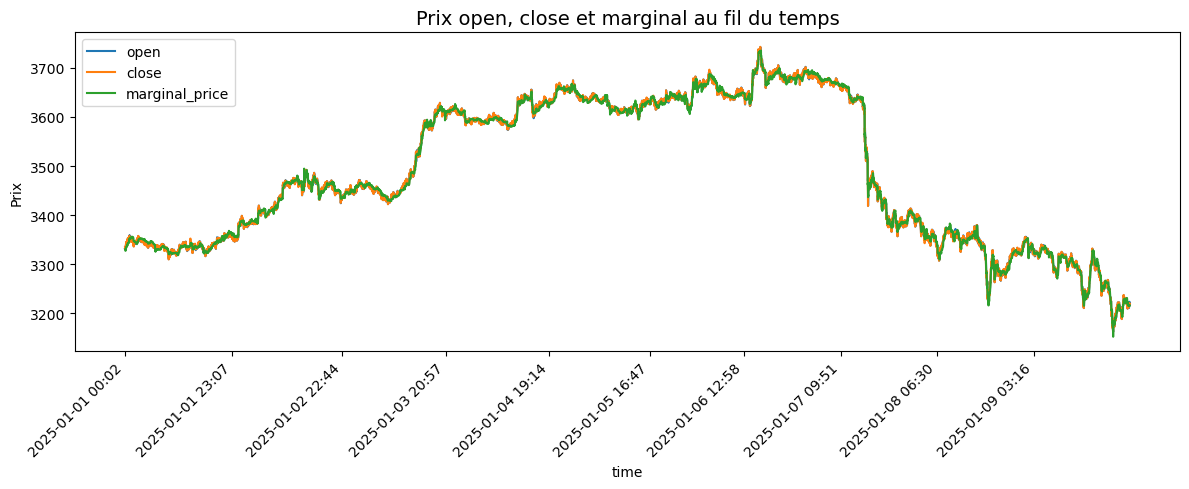

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))

df_merged[['open', 'close', 'marginal_price']].plot(ax=ax)

ax.set_title('Prix open, close et marginal au fil du temps', fontsize=14)
ax.set_ylabel('Prix')
ax.legend(loc='upper left')

ax.set_xticks(df_merged.index[::len(df_merged)//10])
ax.set_xticklabels(df_merged.index[::len(df_merged)//10].strftime('%Y-%m-%d %H:%M'), rotation=45, ha='right')

plt.tight_layout()
plt.show()

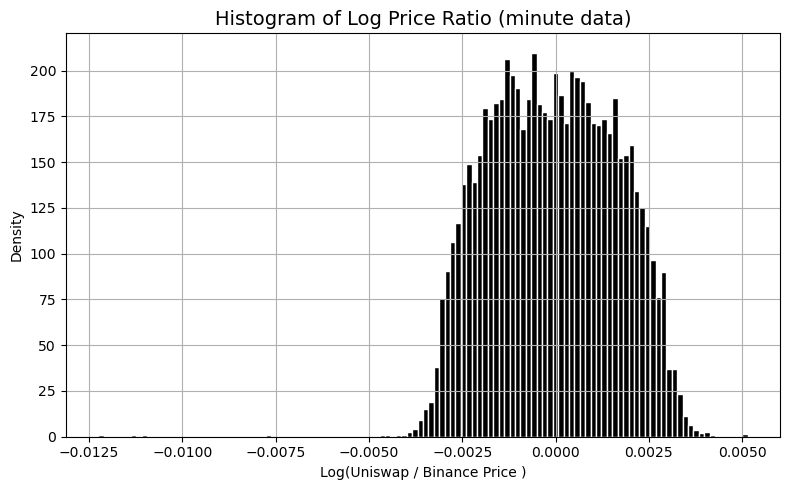

In [19]:
log_ratio_open = np.log(df_merged['marginal_price'] / df_merged['open'])

plt.figure(figsize=(8, 5))
plt.hist(log_ratio_open, bins=120, color='k', edgecolor='white', density=True)

plt.title('Histogram of Log Price Ratio (minute data)', fontsize=14)
plt.xlabel('Log(Uniswap / Binance Price )')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'log_ratio_uni_bin_{date}.pdf')
plt.show()


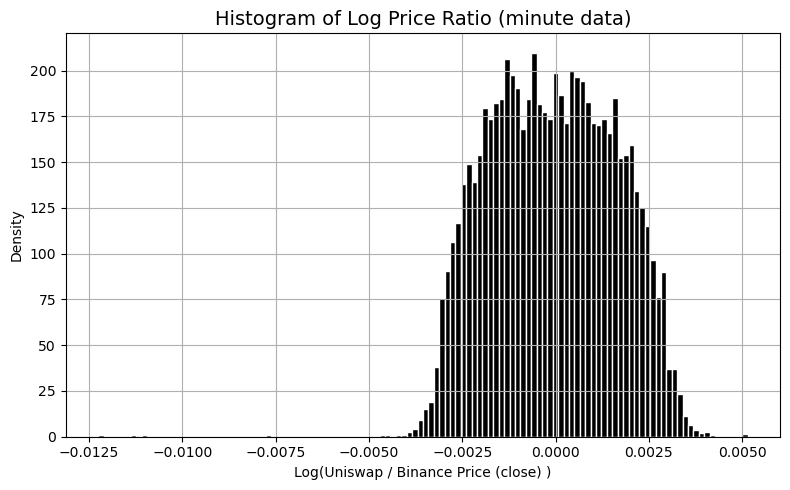

In [20]:
log_ratio_close = np.log(df_merged['marginal_price'] / df_merged['close'])

plt.figure(figsize=(8, 5))
plt.hist(log_ratio_open, bins=120, color='k', edgecolor='white', density=True)

plt.title('Histogram of Log Price Ratio (minute data)', fontsize=14)
plt.xlabel('Log(Uniswap / Binance Price (close) )')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

Remove extreme values

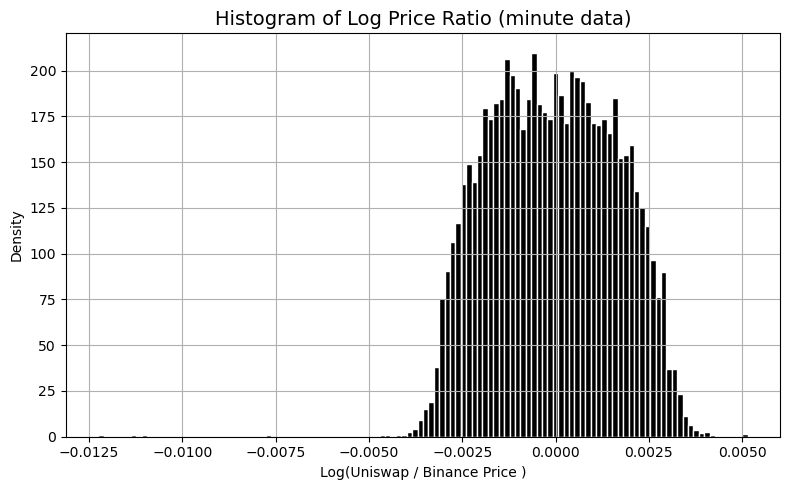

In [22]:
log_ratio_filtered = log_ratio_open[(log_ratio_open >= -0.02) & (log_ratio_open <= 0.02)]

plt.figure(figsize=(8, 5))
plt.hist(log_ratio_filtered, bins=120, color='k', edgecolor='white', density=True)

plt.title('Histogram of Log Price Ratio (minute data)', fontsize=14)
plt.xlabel('Log(Uniswap / Binance Price )')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'log_ratio_uni_bin_{date}_filtered.pdf')
plt.show()

In [23]:
print(np.shape(log_ratio_open))
print(np.shape(log_ratio_filtered))

(9730,)
(9730,)


In [24]:
log_ratio_filtered

time
2025-01-01 00:02:00+00:00   -0.000812
2025-01-01 00:04:00+00:00   -0.001005
2025-01-01 00:05:00+00:00   -0.001102
2025-01-01 00:06:00+00:00   -0.002224
2025-01-01 00:07:00+00:00   -0.002275
                               ...   
2025-01-09 23:51:00+00:00    0.000008
2025-01-09 23:53:00+00:00   -0.002368
2025-01-09 23:54:00+00:00   -0.001171
2025-01-09 23:55:00+00:00   -0.000706
2025-01-09 23:57:00+00:00   -0.000214
Length: 9730, dtype: float64

In [25]:
import pickle

with open(f"hist_dist_{date}.pkl", "wb") as f:
    pickle.dump(log_ratio_filtered, f)